# Rozhodovací stromy pro regresi a ensemble metody

  * V tomto notebooku si budeme hrát s populárním datasetem stahnutým z [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).
  * Jedná se o údaje o domech a jejich cenách. Cílem je předpovědět **cenu domu (příznak SalePrice)** na základě celkem 79 příznaků.

### Sloupce v datasetu jsou (anglicky):

  * **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
  * **MSSubClass**: The building class
  * **MSZoning**: The general zoning classification
  * **LotFrontage**: Linear feet of street connected to property
  * **LotArea**: Lot size in square feet
  * **Street**: Type of road access
  * **Alley**: Type of alley access
  * **LotShape**: General shape of property
  * **LandContour**: Flatness of the property
  * **Utilities**: Type of utilities available
  * **LotConfig**: Lot configuration
  * **LandSlope**: Slope of property
  * **Neighborhood**: Physical locations within Ames city limits
  * **Condition1**: Proximity to main road or railroad
  * **Condition2**: Proximity to main road or railroad (if a second is present)
  * **BldgType**: Type of dwelling
  * **HouseStyle**: Style of dwelling
  * **OverallQual**: Overall material and finish quality
  * **OverallCond**: Overall condition rating
  * **YearBuilt**: Original construction date
  * **YearRemodAdd**: Remodel date
  * **RoofStyle**: Type of roof
  * **RoofMatl**: Roof material
  * **Exterior1st**: Exterior covering on house
  * **Exterior2nd**: Exterior covering on house (if more than one material)
  * **MasVnrType**: Masonry veneer type
  * **MasVnrArea**: Masonry veneer area in square feet
  * **ExterQual**: Exterior material quality
  * **ExterCond**: Present condition of the material on the exterior
  * **Foundation**: Type of foundation
  * **BsmtQual**: Height of the basement
  * **BsmtCond**: General condition of the basement
  * **BsmtExposure**: Walkout or garden level basement walls
  * **BsmtFinType1**: Quality of basement finished area
  * **BsmtFinSF1**: Type 1 finished square feet
  * **BsmtFinType2**: Quality of second finished area (if present)
  * **BsmtFinSF2**: Type 2 finished square feet
  * **BsmtUnfSF**: Unfinished square feet of basement area
  * **TotalBsmtSF**: Total square feet of basement area
  * **Heating**: Type of heating
  * **HeatingQC**: Heating quality and condition
  * **CentralAir**: Central air conditioning
  * **Electrical**: Electrical system
  * **1stFlrSF**: First Floor square feet
  * **2ndFlrSF**: Second floor square feet
  * **LowQualFinSF**: Low quality finished square feet (all floors)
  * **GrLivArea**: Above grade (ground) living area square feet
  * **BsmtFullBath**: Basement full bathrooms
  * **BsmtHalfBath**: Basement half bathrooms
  * **FullBath**: Full bathrooms above grade
  * **HalfBath**: Half baths above grade
  * **Bedroom**: Number of bedrooms above basement level
  * **Kitchen**: Number of kitchens
  * **KitchenQual**: Kitchen quality
  * **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
  * **Functional**: Home functionality rating
  * **Fireplaces**: Number of fireplaces
  * **FireplaceQu**: Fireplace quality
  * **GarageType**: Garage location
  * **GarageYrBlt**: Year garage was built
  * **GarageFinish**: Interior finish of the garage
  * **GarageCars**: Size of garage in car capacity
  * **GarageArea**: Size of garage in square feet
  * **GarageQual**: Garage quality
  * **GarageCond**: Garage condition
  * **PavedDrive**: Paved driveway
  * **WoodDeckSF**: Wood deck area in square feet
  * **OpenPorchSF**: Open porch area in square feet
  * **EnclosedPorch**: Enclosed porch area in square feet
  * **3SsnPorch**: Three season porch area in square feet
  * **ScreenPorch**: Screen porch area in square feet
  * **PoolArea**: Pool area in square feet
  * **PoolQC**: Pool quality
  * **Fence**: Fence quality
  * **MiscFeature**: Miscellaneous feature not covered in other categories
  * **MiscVal**: $Value of miscellaneous feature
  * **MoSold**: Month Sold
  * **YrSold**: Year Sold
  * **SaleType**: Type of sale
  * **SaleCondition**: Condition of sale

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house-prices-train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## První pokus o použití DecisionTreeRegressor

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(data.drop(columns=['SalePrice']), data.SalePrice)

ValueError: could not convert string to float: 'Normal'

  * Potřebujeme převést textové příznaky (`dtype = object`) na příznaky číselné.
  * Zkusme nejprve nastavit jejich typ na *kategoriální* (`dtype = category`). Pandas si pak tyto příznaky interně ukládá jako číselné. 
  * Jako kategoriální lze cháat pouze příznaky *s ne moc růnými hodnotami* (anpř. jméno není vhodné).

In [5]:
str_cols = data.select_dtypes('object').columns
print('There are {} columns with string values'.format(len(str_cols)))
data[str_cols].nunique()

There are 43 columns with string values


MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

  * V našem případě lze brát jako kategoriální všechny textové příznaky.

In [6]:
for col in str_cols:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null catego

In [12]:
dt = DecisionTreeRegressor(max_depth=3)
#dt.fit(data.drop(columns=['SalePrice']), data.SalePrice)

  * **Implementace rozhodovacích stromů v `scikit-learn` tedy nepodporuje `dtype = category`!** 
  * Vývojáři se o tom baví [zde](https://github.com/scikit-learn/scikit-learn/pull/4899).
  * Musíme i katedoriální proměnné nahradit čísly.
  * Pro řazené kategoriální příznaky (tzv. **ordinální**) je tento přístup v pořádku.
  * Pro ty neřazené (**nominální**) je tento přístup poněkud nešťastný (čísla seřazená vřdycky jsou).
  * Nominální příznaky tak můžeme nahradit tzv. **dummy** přínzaky pomocí **one-hot encoding**.
  * Bohužel ale rozhodnutí, který příznak je nominální a který ordinální, lze jen stěží automatizovat a je nutné postupovat ručně.
  * Dobrým kandidátem pro ordinální příznak je *KitchenQual*. 

In [8]:
data.KitchenQual.unique()

[Gd, TA, Ex, Fa]
Categories (4, object): [Gd, TA, Ex, Fa]

  * Dle popisu v souboru `data_description.txt`: Ex = Excellent, Gd = Good, TA = Typical/Average, Fa = Fair, Po = Poor.
  * Takže bychom chtěli tyto textové hosnoty nahradit čísly tak, aby se zachovalo pořadí Po < Fa < TA < Gd < Ex.

In [9]:
mapper = {
    'Po' : 0,
    'Fa' : 1,
    'TA' : 2,
    'Gd' : 3,
    'Ex' : 4
}
display(data.KitchenQual.replace(mapper).head(10))
display(data.KitchenQual.head(10))
data.KitchenQual = data.KitchenQual.replace(mapper)

0    3
1    2
2    3
3    3
4    3
5    2
6    3
7    2
8    2
9    2
Name: KitchenQual, dtype: int64

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
5    TA
6    Gd
7    TA
8    TA
9    TA
Name: KitchenQual, dtype: category
Categories (4, object): [Ex, Fa, Gd, TA]

In [13]:
from sklearn.preprocessing import LabelEncoder
def encode_categories(df, mappers, dummies=False):
    le = LabelEncoder()
    for col in df.select_dtypes('object').columns:
        if col not in mappers and df[col].nunique() < 30:
            df[col] = df[col].fillna('NaN')
            df[col] = le.fit_transform(df[col])
            if dummies:
                prefix = 'd_' + col
                df = pd.concat([df.drop(columns=[col]), pd.get_dummies(df[col], prefix=prefix)], axis=1)
        elif col in mappers:
            df[col] = df[col].replace(mappers[col])
    return df
        

In [14]:
data = pd.read_csv('house-prices-train.csv')
ordinal_cols_mappers = {
    'KitchenQual': {'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}
}
data = encode_categories(data, ordinal_cols_mappers)
data.fillna('-1', inplace=True)
data.SalePrice = np.log1p(data.SalePrice)
data.shape

(1460, 81)

 * Zkusme to s DecisionTreeRegressor znovu.

In [16]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(data.drop(columns=['SalePrice']), data.SalePrice)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
from sklearn.model_selection import train_test_split
def split_data(Xdata, ydata, ratio=0.25, rd_seed=5656):
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state=rd_seed) 
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 
    return Xtrain, Xtest, Xval, ytrain, ytest, yval

In [18]:
Xtrain, Xtest, Xval, ytrain, ytest, yval = split_data(data.drop(columns=['SalePrice']), data.SalePrice)

In [19]:
param_grid = {
    'max_depth': range(1,10)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = DecisionTreeRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = DecisionTreeRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'max_depth': 5}
RMSLE (train): 0.151525
RMSLE (validation): 0.177457
RMSLE (test): 0.210466


## Náhodný les `RandomForestRegressor`

  * Použití lesa místo stromu je `sklearn` velice jednoduché: stačí nahradit `DecisionTreeRegressor` v kódu výše  třídou `RandomForestRegressor`.
  * Má skoro stejné parametry jako `DecisionTreeRegressor`.
  * Má ale také jeden nový (`n_estimators`), který je zásadní a určuje počet stromů v lese.

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
param_grid = {
    'n_estimators': range(1,100,5),
    'max_depth': range(1,5)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = RandomForestRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = RandomForestRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'n_estimators': 31, 'max_depth': 4}
RMSLE (train): 0.150054
RMSLE (validation): 0.148915
RMSLE (test): 0.163357


## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostRegressor

In [23]:
param_grid = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = AdaBoostRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = AdaBoostRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

{'n_estimators': 76, 'learning_rate': 0.3}
RMSLE (train): 0.151637
RMSLE (validation): 0.158332
RMSLE (test): 0.162573


# Úkol: zkuste snížit RMSLE jak to jen jde

In [44]:
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib
import seaborn as sns

In [45]:
data = pd.read_csv('house-prices-train.csv')
data.SalePrice = np.log1p(data.SalePrice)

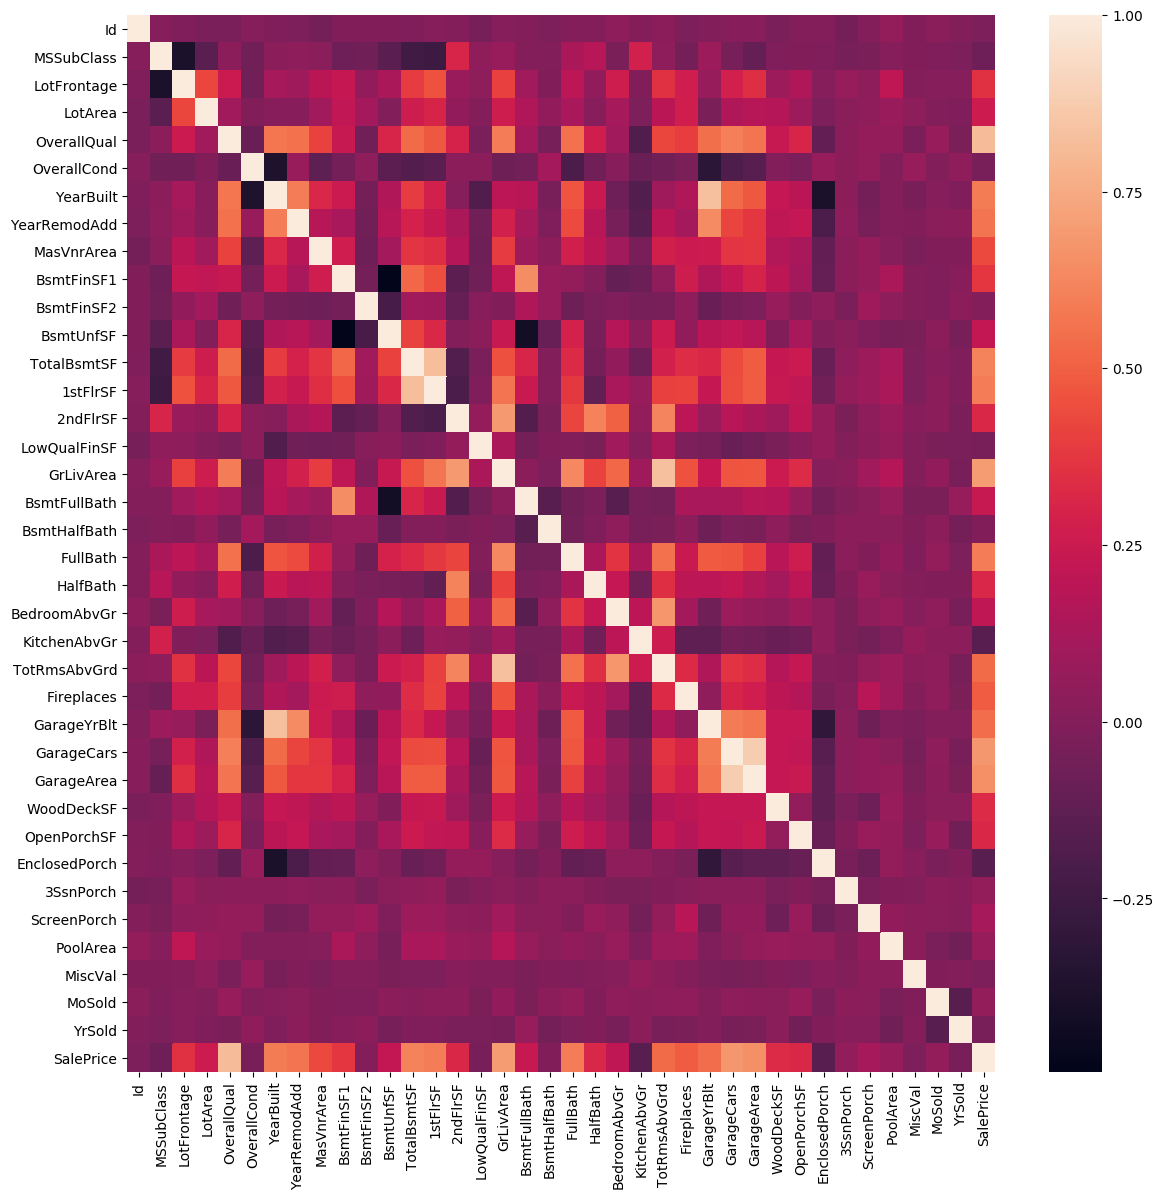

In [38]:
plt.figure(figsize=(14,14),dpi=100)
#cor_matrix = data.drop('PassengerId', axis=1).corr()
#print(cor_matrix)
sns.heatmap(data.corr())
plt.show()

In [49]:
### sem napište svůj kód
data = data[['OverallQual','GarageArea','GarageCars','GarageYrBlt','Fireplaces','TotRmsAbvGrd','FullBath','GrLivArea','1stFlrSF','TotalBsmtSF','YearRemodAdd','YearBuilt','SalePrice']]
data.dropna()
Xtrain, Xtest, Xval, ytrain, ytest, yval = split_data(data.drop(columns=['SalePrice']), data.SalePrice)


In [50]:
param_grid = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = AdaBoostRegressor(**params)
    dt.fit(Xtrain, ytrain)
    val_acc.append(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval))))
best_params = param_comb[np.argmin(val_acc)]
print(best_params)
dt = AdaBoostRegressor(**best_params)
dt.fit(Xtrain, ytrain)
print('RMSLE (train): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytrain, dt.predict(Xtrain)))))
print('RMSLE (validation): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(yval, dt.predict(Xval)))))
print('RMSLE (test): {0:.6f}'.format(math.sqrt(metrics.mean_squared_error(ytest, dt.predict(Xtest)))))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').